<a href="https://colab.research.google.com/github/Milind1505/Wine-Price-Prediction-ML/blob/main/Wine%20Price%20Prediction%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading dataset file into a dataframe called 'df'

df = pd.read_csv('/content/drive/MyDrive/wine_project.csv')
df.head()

,id,country,title,score,price,state,region_1,region_2,variety,winery
0,1,US,:Nota Bene 2005 Una Notte Red (Washington),89.0,30.0,Washington,Washington,Washington Other,Red Blend,:Nota Bene
1,2,US,:Nota Bene 2006 Verhey Vineyard Malbec (Yakima...,89.0,30.0,Washington,Yakima Valley,Columbia Valley,Malbec,:Nota Bene
2,3,US,:Nota Bene 2007 Ciel du Cheval Vineyard Syrah ...,91.0,35.0,Washington,Red Mountain,Columbia Valley,Syrah,:Nota Bene
3,4,US,:Nota Bene 2007 Conner Lee Vineyard Merlot (Co...,88.0,32.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,:Nota Bene
4,5,US,:Nota Bene 2007 Conner Lee Vineyard Red (Colum...,88.0,32.0,Washington,Columbia Valley (WA),Columbia Valley,Bordeaux-style Red Blend,:Nota Bene


Data Cleaning


In [ ]:
# Omitting the country column
del df['country']

In [ ]:
# Displaying the DataFrame that we just manipulated
df.head()

,id,title,score,price,state,region_1,region_2,variety,winery
0,1,:Nota Bene 2005 Una Notte Red (Washington),89.0,30.0,Washington,Washington,Washington Other,Red Blend,:Nota Bene
1,2,:Nota Bene 2006 Verhey Vineyard Malbec (Yakima...,89.0,30.0,Washington,Yakima Valley,Columbia Valley,Malbec,:Nota Bene
2,3,:Nota Bene 2007 Ciel du Cheval Vineyard Syrah ...,91.0,35.0,Washington,Red Mountain,Columbia Valley,Syrah,:Nota Bene
3,4,:Nota Bene 2007 Conner Lee Vineyard Merlot (Co...,88.0,32.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,:Nota Bene
4,5,:Nota Bene 2007 Conner Lee Vineyard Red (Colum...,88.0,32.0,Washington,Columbia Valley (WA),Columbia Valley,Bordeaux-style Red Blend,:Nota Bene


In [ ]:
#Checking for null values to clean the data, so that they can be removed, because ML models do not accept them
df.isnull().sum()

id             0
title          0
score       1000
price       2959
state          0
region_1     278
region_2    3993
variety     2240
winery       306
dtype: int64

In [ ]:
#Dropping the null values and saving the result in a dataframe called df
df = df.dropna()

In [ ]:
#Checking for null values to check the dataframe
df.isnull().sum()

id          0
title       0
score       0
price       0
state       0
region_1    0
region_2    0
variety     0
winery      0
dtype: int64

In [ ]:
#Dataframe.shape is used to give the dimensions of the dataframe
df.shape

(45355, 9)

In [ ]:
#Dataframe.describe returns the description of the dataframe
df.describe()

,id,score,price
count,45355.000000,45355.000000,45355.000000
mean,27514.577665,88.643391,37.156344
std,15736.637379,3.112182,27.845807
min,1.000000,80.000000,4.000000
25%,14292.500000,86.000000,20.000000
50%,27671.000000,89.000000,30.000000
75%,41090.500000,91.000000,45.000000
max,54503.000000,100.000000,2013.000000


In [ ]:
#There is no significance of using the columns with values that can't be used to get any important information to be analysed, hence only using the columns which give off numerical values of essence for analysis.
df.drop(columns=['id']).describe()

,score,price
count,45355.000000,45355.000000
mean,88.643391,37.156344
std,3.112182,27.845807
min,80.000000,4.000000
25%,86.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


In [ ]:
#Dataframe.info in the pandas proves to be an invaluable tool, it gives informative overview of the dataset (basically gives the types of the datasets, like object, floats, int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45355 entries, 0 to 54502
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        45355 non-null  int64  
 1   title     45355 non-null  object 
 2   score     45355 non-null  float64
 3   price     45355 non-null  float64
 4   state     45355 non-null  object 
 5   region_1  45355 non-null  object 
 6   region_2  45355 non-null  object 
 7   variety   45355 non-null  object 
 8   winery    45355 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.5+ MB


In [ ]:
# new dataset has 45355 enteries and 9 columns (including id)


 Exploratory data analysis

In [ ]:
#Set_index is used to set a particular column as index
df.set_index('id', inplace=True)

<Axes: >

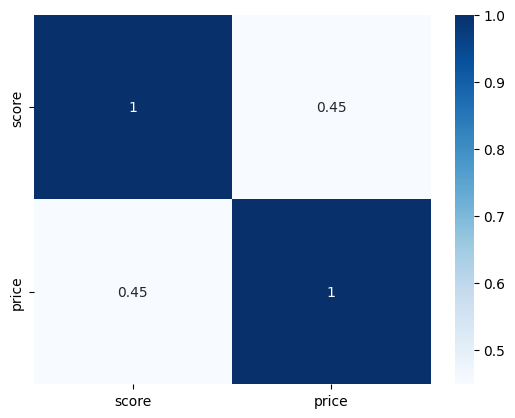

In [ ]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

In [ ]:
# numerical variables does not have much of a correlation, the reason why we started analysing on the basic of type of wine and score was because the heatmap above does not show any relation between score and price

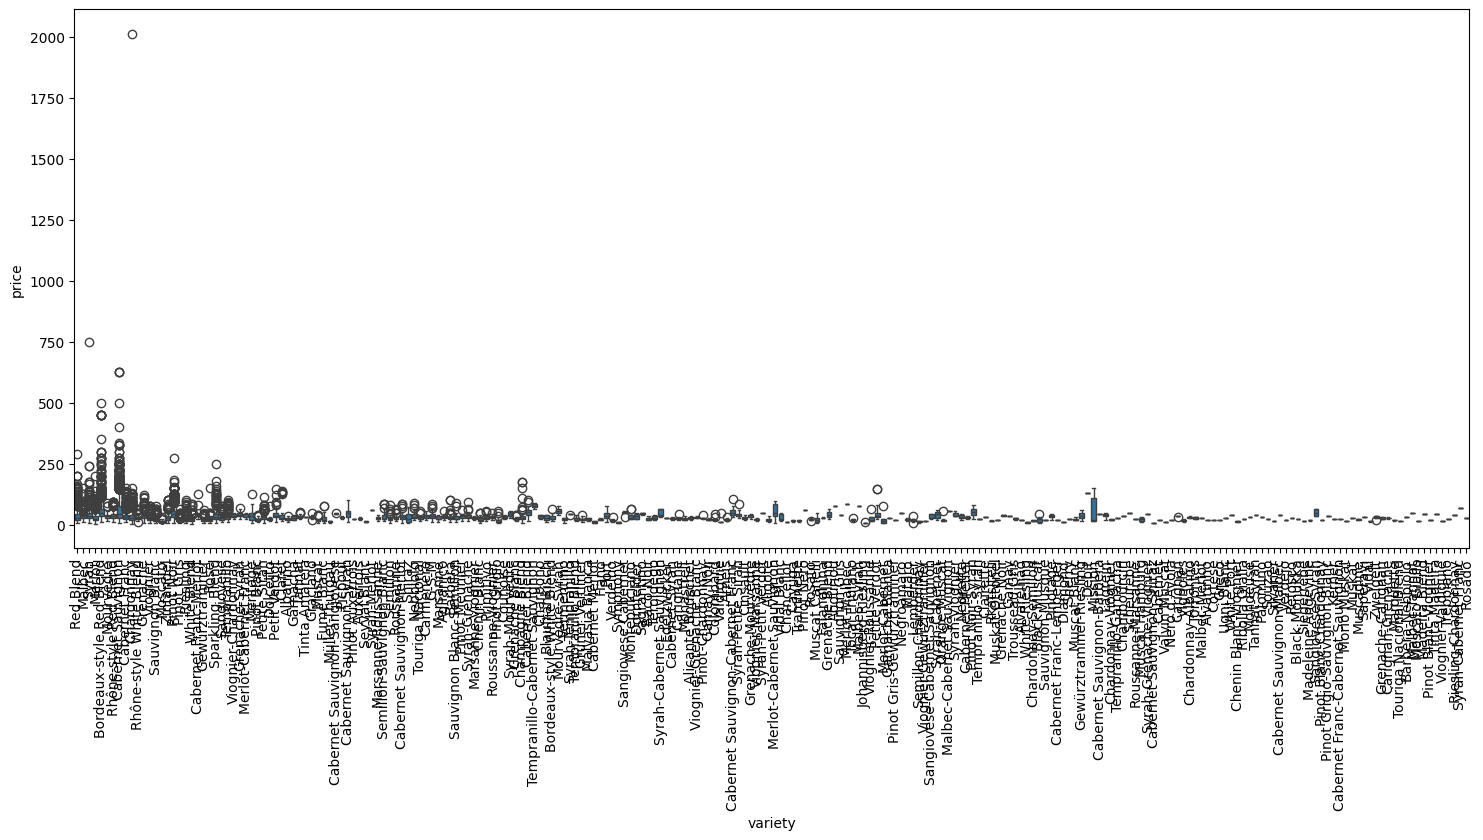

In [ ]:
#This plot is for price and variety, to see which variety costs what, using box plotting

fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='variety', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()


# An outlier is that data point in a data set which is very different from the rest of the observations.
# It could occur due to many reasons like being the result of an error caused due to an experiment,
# or a variability in measurement, or an indication of the presence of novel data, the errors are mostly
# excluded from the data set

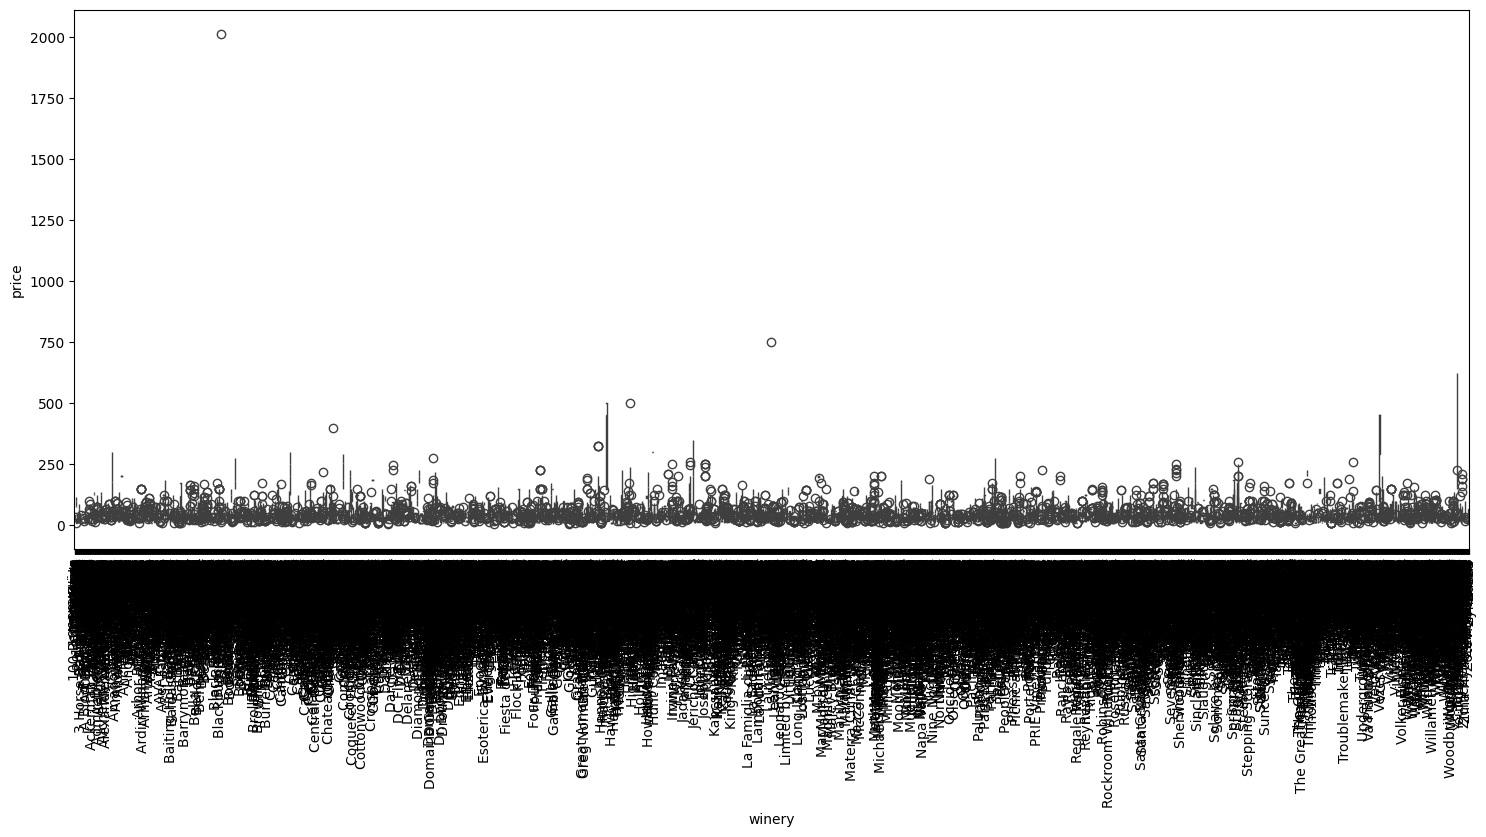

In [ ]:
# This plot is for price and winery, to see which winery's wine costs what, using box plotting
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='winery', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

The above plots don't add much value to our analysis as the number of wineries and varieties are way too many to understand the pattern using a single plot.
The insights collected by the above graphs are -
1. We have a single outlier, so we are not rejecting it.
2. We don't want to complicate the process because of 1 single outlier.
3. The plots depict the wine which has the maximum and the minimum price

In [ ]:
# These functions return colums that have objects in their datatype
print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))

Categorical columns: 
title
state
region_1
region_2
variety
winery


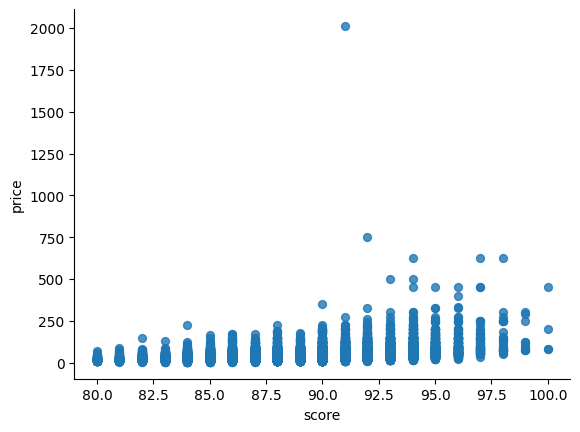

In [ ]:
# This plot is between score and price, its a scatter plot and the library that is being used here is matplot

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='score', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# splitting the data using train test split
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
# training the model
X_train

,title,score,state,region_1,region_2,variety,winery
id,,,,,,,
18210,13534,87.0,4,126,14,43,1563
48234,37102,87.0,1,22,1,146,4196
33485,25589,89.0,1,145,1,43,2845
1390,1152,88.0,4,192,16,140,143
12531,9024,88.0,4,192,16,140,1016
...,...,...,...,...,...,...,...
45273,34722,88.0,1,158,12,72,3980
27772,21116,88.0,4,192,16,140,2375
37795,28851,89.0,1,15,0,166,3277


In [ ]:
# importing libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# train_test_split from sklearn.model_selection and use it to split our dataset into training and testing subsets.
# We'll optimise our model using the training subset, and then assess the performance using the testing subset.
# These are data that our model won't have seen before
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [ ]:
# Using a mojority of regressor models to see which fits best
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR',
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+07, tolerance: 2.898e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Running all models to get their respective R squared values
models

{'Linear Regression': 0.2879537119203661,
 'Lasso': 0.2866041226313514,
 'Ridge': 0.287953705966954,
 'Bayesian Ridge': 0.2879522330808758,
 'Decision Tree Regressor': 0.32884744841261193,
 'Linear SVR': 0.02939849627585489,
 'KNeighbors Regressor': 0.4053988554837885,
 'Random Forest Regressor': 0.5901676386290728}

Now that we've got an idea of what model we can deal with, let's build our regressors. Fortunately, we  have two models which have the maximum R-Squared values, so implementing them ourselves; the Scikit-Learn module (sklearn) provides different kinds of Model ready-built

In [ ]:
# Building the model
model = KNeighborsRegressor()
# When we call model.fit(x, y), we're solving the regression problem by fitting our model ( y^i←f(xi) ) to our dataset ( {xi,yi}Ni )
model.fit(X_train, y_train)

# When we call model.predict(x), we're using our optimised model ( y^i←f(x^i) ) to produce a prediction,  y^i , for the class label associated with  x^i .
y_pred = model.predict(X_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

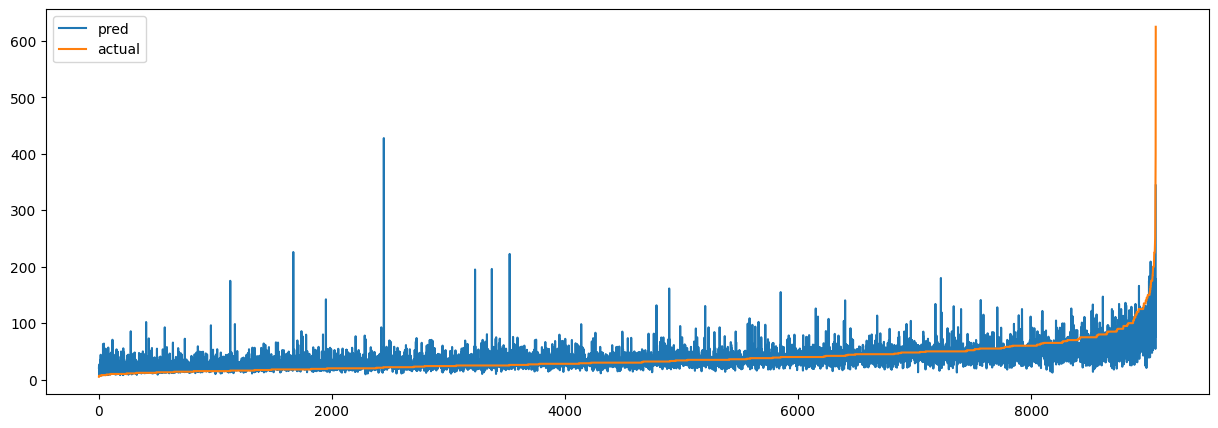

In [ ]:
# Lets display the predicted and the actual values to depict the accuracy of our regressor model
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 405.6606107375152


In [ ]:
# Building the model
model = RandomForestRegressor()
# When we call model.fit(x, y), we're solving the regression problem by fitting our model ( y^i←f(xi) ) to our dataset ( {xi,yi}Ni )
model.fit(X_train, y_train)

# When we call model.predict(x), we're using our optimised model ( y^i←f(x^i) ) to produce a prediction,  y^i , for the class label associated with  x^i .
y_pred = model.predict(X_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

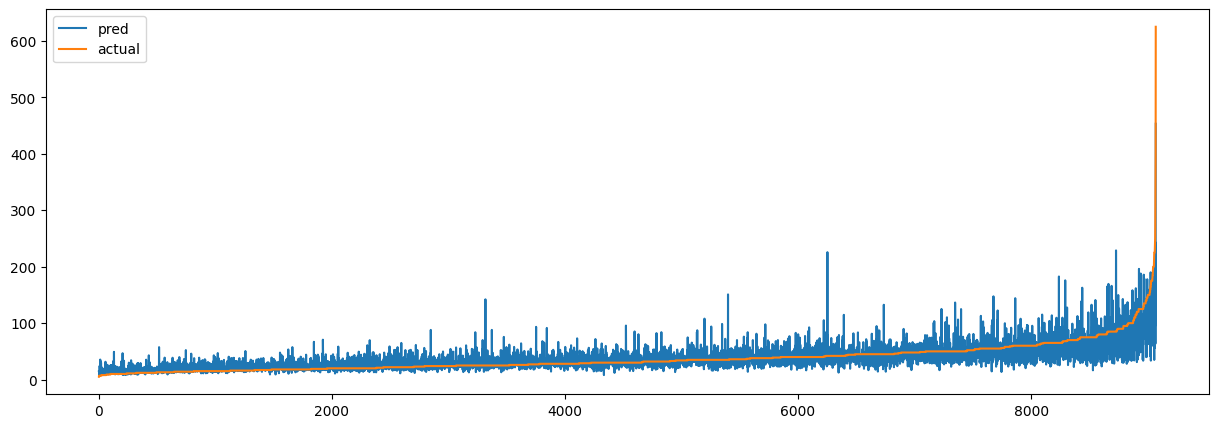

In [ ]:
# Lets display the predicted and the actual values to depict the accuracy of our regressor model
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 275.0049078067312


If we compare both the models on the basis of plots we can see Random Forest has neglected the outliers and it also has much larger values for r square as compared to KNN.
The aforementioned comparison can be proved by the results that both the models have given.  